In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import sklearn.datasets as sd
import sklearn.utils as su
import sklearn.metrics as sm
import sklearn.model_selection as ms
import sklearn.preprocessing as sp
import sklearn.pipeline as pl
import sklearn.tree as st
import sklearn.ensemble as se
import sklearn.linear_model as lm

              precision    recall  f1-score   support

         0.0       0.64      0.96      0.77        45
         1.0       0.75      0.20      0.32        30

    accuracy                           0.65        75
   macro avg       0.70      0.58      0.54        75
weighted avg       0.69      0.65      0.59        75



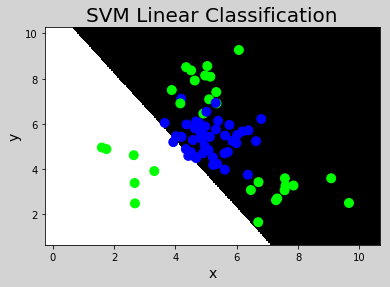

In [4]:
import sklearn.svm as svm
data = np.loadtxt('multiple2.txt', delimiter=',', dtype='f8')
x = data[:, :-1]
y = data[:, -1]
train_x, test_x, train_y, test_y = ms.train_test_split(x,
                                                       y,
                                                       test_size=0.25,
                                                       random_state=5)
# 基于线性核函数的支持向量机分类器
model = svm.SVC(kernel='linear')
model.fit(train_x, train_y)
n = 500
l, r = x[:, 0].min() - 1, x[:, 0].max() + 1
b, t = x[:, 1].min() - 1, x[:, 1].max() + 1
grid_x = np.meshgrid(np.linspace(l, r, n), np.linspace(b, t, n))
flat_x = np.column_stack((grid_x[0].ravel(), grid_x[1].ravel()))
flat_y = model.predict(flat_x)
grid_y = flat_y.reshape(grid_x[0].shape)
pred_test_y = model.predict(test_x)
cr = sm.classification_report(test_y, pred_test_y)
print(cr)
plt.figure('SVM Linear Classification', facecolor='lightgray')
plt.title('SVM Linear Classification', fontsize=20)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.tick_params(labelsize=10)
plt.pcolormesh(grid_x[0], grid_x[1], grid_y, cmap='gray')
plt.scatter(test_x[:, 0], test_x[:, 1], c=test_y, cmap='brg', s=80)
plt.show()

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90        45
         1.0       0.84      0.87      0.85        30

    accuracy                           0.88        75
   macro avg       0.87      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



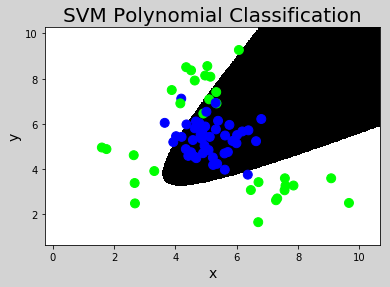

In [5]:
import sklearn.svm as svm
data = np.loadtxt('multiple2.txt', delimiter=',', dtype='f8')
x = data[:, :-1]
y = data[:, -1]
train_x, test_x, train_y, test_y = ms.train_test_split(x,
                                                       y,
                                                       test_size=0.25,
                                                       random_state=5)
# 基于多项式核函数的支持向量机分类器
model = svm.SVC(kernel='poly', degree=2)
model.fit(train_x, train_y)
n = 500
l, r = x[:, 0].min() - 1, x[:, 0].max() + 1
b, t = x[:, 1].min() - 1, x[:, 1].max() + 1
grid_x = np.meshgrid(np.linspace(l, r, n), np.linspace(b, t, n))
flat_x = np.column_stack((grid_x[0].ravel(), grid_x[1].ravel()))
flat_y = model.predict(flat_x)
grid_y = flat_y.reshape(grid_x[0].shape)
pred_test_y = model.predict(test_x)
cr = sm.classification_report(test_y, pred_test_y)
print(cr)
plt.figure('SVM Polynomial Classification', facecolor='lightgray')
plt.title('SVM Polynomial Classification', fontsize=20)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.tick_params(labelsize=10)
plt.pcolormesh(grid_x[0], grid_x[1], grid_y, cmap='gray')
plt.scatter(test_x[:, 0], test_x[:, 1], c=test_y, cmap='brg', s=80)
plt.show()

              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94        45
         1.0       0.88      0.97      0.92        30

    accuracy                           0.93        75
   macro avg       0.93      0.94      0.93        75
weighted avg       0.94      0.93      0.93        75



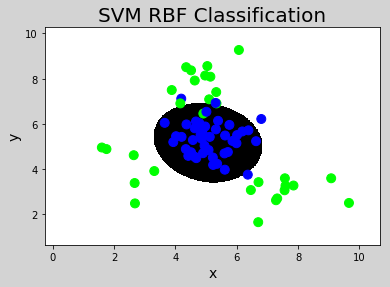

In [13]:
import sklearn.svm as svm
data = np.loadtxt('multiple2.txt', delimiter=',', dtype='f8')
x = data[:, :-1]
y = data[:, -1]
train_x, test_x, train_y, test_y = ms.train_test_split(x,
                                                       y,
                                                       test_size=0.25,
                                                       random_state=5)
# 基于径向基核函数的支持向量机分类器
model = svm.SVC(kernel='rbf', C=600, gamma=0.01)
model.fit(train_x, train_y)
n = 500
l, r = x[:, 0].min() - 1, x[:, 0].max() + 1
b, t = x[:, 1].min() - 1, x[:, 1].max() + 1
grid_x = np.meshgrid(np.linspace(l, r, n), np.linspace(b, t, n))
flat_x = np.column_stack((grid_x[0].ravel(), grid_x[1].ravel()))
flat_y = model.predict(flat_x)
grid_y = flat_y.reshape(grid_x[0].shape)
pred_test_y = model.predict(test_x)
cr = sm.classification_report(test_y, pred_test_y)
print(cr)
plt.figure('SVM RBF Classification', facecolor='lightgray')
plt.title('SVM RBF Classification', fontsize=20)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.tick_params(labelsize=10)
plt.pcolormesh(grid_x[0], grid_x[1], grid_y, cmap='gray')
plt.scatter(test_x[:, 0], test_x[:, 1], c=test_y, cmap='brg', s=80)
plt.show()

In [20]:
params = [{
    'kernel': ['linear'],
    'C': [1, 10, 100, 1000]
}, {
    'kernel': ['poly'],
    'C': [1],
    'degree': [2, 3]
}, {
    'kernel': ['rbf'],
    'C': [1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001]
}]
model = ms.GridSearchCV(svm.SVC(probability=True), params, cv=5)
model.fit(train_x, train_y)

print(model.best_params_)
print(model.best_estimator_)
print(model.best_score_)

for p, s in zip(model.cv_results_['params'],
        model.cv_results_['mean_test_score']):
    print(p, s)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
0.96
{'C': 1, 'kernel': 'linear'} 0.5911111111111111
{'C': 10, 'kernel': 'linear'} 0.5911111111111111
{'C': 100, 'kernel': 'linear'} 0.5911111111111111
{'C': 1000, 'kernel': 'linear'} 0.5911111111111111
{'C': 1, 'degree': 2, 'kernel': 'poly'} 0.8844444444444445
{'C': 1, 'degree': 3, 'kernel': 'poly'} 0.8844444444444445
{'C': 1, 'gamma': 1, 'kernel': 'rbf'} 0.96
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} 0.9511111111111111
{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'} 0.8311111111111111
{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'} 0.5333333333333333
{'C': 10, 'gamma': 1, 'kernel': 'rbf'} 0.96
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'} 0.96
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'} 0.92
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'} 0.5244444444444

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94        45
         1.0       0.90      0.93      0.92        30

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.93      0.93      0.93        75



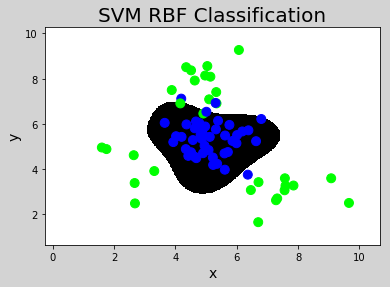

In [21]:
n = 500
l, r = x[:, 0].min() - 1, x[:, 0].max() + 1
b, t = x[:, 1].min() - 1, x[:, 1].max() + 1
grid_x = np.meshgrid(np.linspace(l, r, n), np.linspace(b, t, n))
flat_x = np.column_stack((grid_x[0].ravel(), grid_x[1].ravel()))
flat_y = model.predict(flat_x)
grid_y = flat_y.reshape(grid_x[0].shape)
pred_test_y = model.predict(test_x)
cr = sm.classification_report(test_y, pred_test_y)
print(cr)
plt.figure('SVM RBF Classification', facecolor='lightgray')
plt.title('SVM RBF Classification', fontsize=20)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.tick_params(labelsize=10)
plt.pcolormesh(grid_x[0], grid_x[1], grid_y, cmap='gray')
plt.scatter(test_x[:, 0], test_x[:, 1], c=test_y, cmap='brg', s=80)
plt.show()